In [1]:
# Data Collection 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv("Housing.csv")

In [3]:
# Data Exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [4]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
# Data Cleaning

data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 59.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B8D791198>,
      dtype=object)

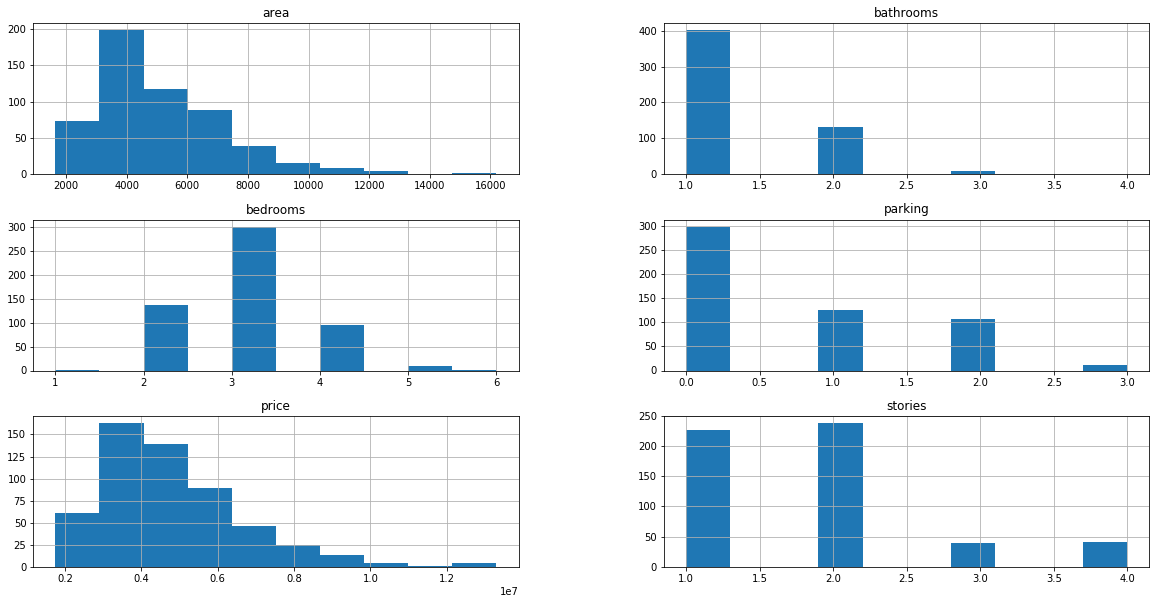

In [7]:
# EDA

data.hist(figsize=(20,10))

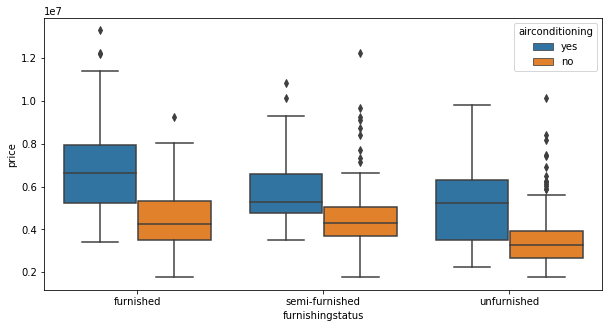

In [8]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = data)
plt.show()

In [9]:
# Preparation of Data

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
data[varlist] = data[varlist].apply(binary_map)

In [10]:
data[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [11]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [12]:
status = pd.get_dummies(data['furnishingstatus'], dtype=int)
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [13]:
status = pd.get_dummies(data['furnishingstatus'], dtype=int, drop_first = True)

In [14]:
data = pd.concat([data, status], axis = 1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [15]:
data.drop(['furnishingstatus'], axis = 1, inplace = True)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [16]:
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.053179,-0.094086


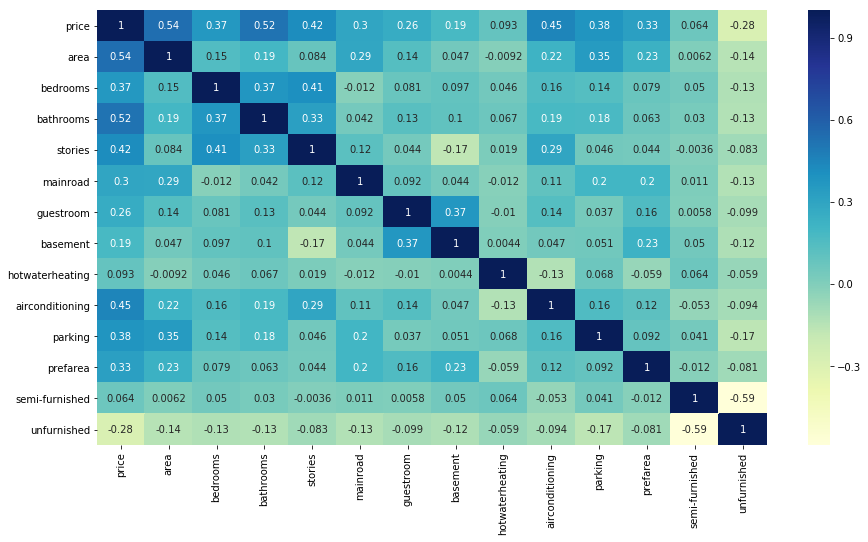

In [17]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [18]:
# Spitting data into Testing & Trainning Data Separately
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

c:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
22,0.596970,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,0,0
41,0.527273,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,0,0
91,0.404242,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,0,0
118,0.363636,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,0,0
472,0.109091,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,1,0


In [22]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,0.263699,0.230390,0.388532,0.097095,0.272936,0.862385,0.172018,0.353211,0.055046,0.300459,0.243884,0.231651,0.412844,0.327982
std,0.161666,0.149756,0.145923,0.167627,0.294125,0.344891,0.377830,0.478517,0.228332,0.458984,0.287502,0.422372,0.492911,0.470017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.119848,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.223333,0.186508,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.351061,0.319131,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


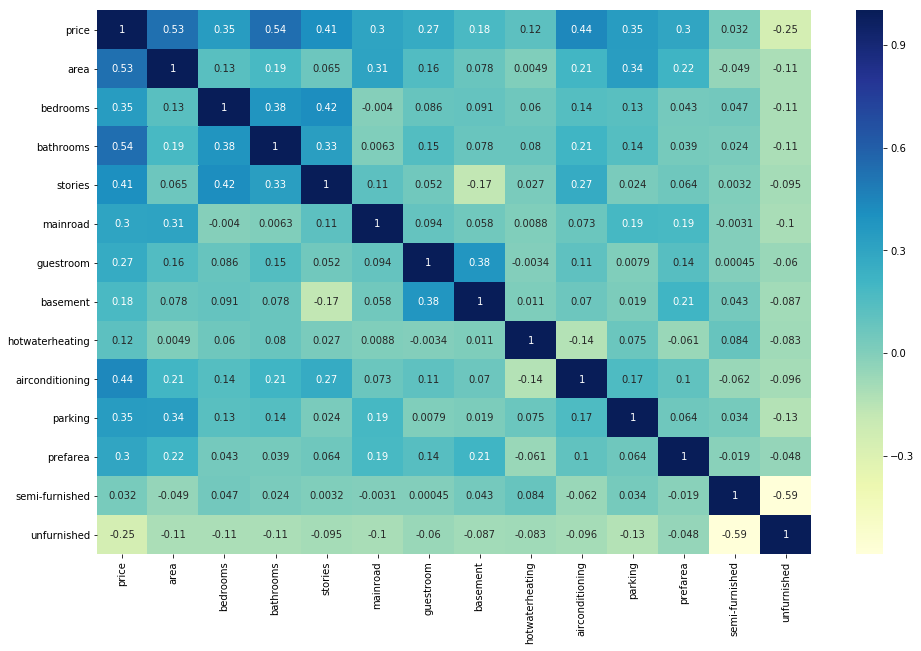

In [23]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [24]:
y_train = df_train.pop('price')
X_train = df_train

In [25]:
# Model Building
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
rfe = RFE(lm, step=6)
rfe = rfe.fit(X_train, y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 3),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 3),
 ('guestroom', False, 3),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', False, 2),
 ('semi-furnished', False, 3),
 ('unfurnished', False, 3)]

In [29]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'parking'],
      dtype='object')

In [30]:
#Building model using statsmodel, for the detailed statistics
X_train_rfe = X_train[col]

In [31]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [32]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [33]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     112.5
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           7.61e-85
Time:                        19:03:12   Log-Likelihood:                 382.41
No. Observations:                 436   AIC:                            -750.8
Df Residuals:                     429   BIC:                            -722.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0652      0.010     

In [34]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.24
2,bathrooms,1.19
1,area,1.18
3,stories,1.18
5,airconditioning,1.18
6,parking,1.16
4,hotwaterheating,1.04


In [36]:
# Residual Analysis of the train data
y_train_price = lm.predict(X_train_rfe)

In [37]:
res = (y_train_price - y_train)

In [38]:
fig = plt.figure()
sns.histplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 432x288 with 0 Axes>

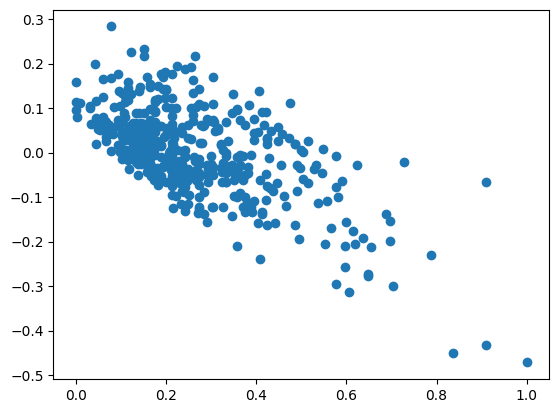

In [54]:
plt.scatter(y_train,res)
plt.show()

In [55]:
# Model Evaluation
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [56]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [57]:
# Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [58]:
X_test = sm.add_constant(X_test)

In [59]:
X_test_rfe = X_test[X_train_rfe.columns]

In [60]:
y_pred = lm.predict(X_test_rfe)

In [61]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.5710072728166289

Text(0, 0.5, 'y_pred')

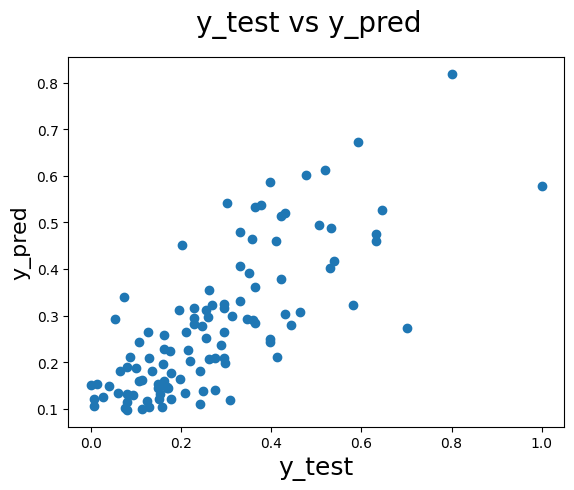

In [62]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)   

In [ ]:
# Price = ( 0.39 * Area + 0.31 * Bathrooms + 0.12 * Stories + 0.07 * hotwatering + 0.08 * AC + 0.07 * parking )